In [1]:
import numpy as np
import time
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision  
from torchvision import datasets
from torch.utils.data.sampler import SubsetRandomSampler
import matplotlib.pyplot as plt
import csv
import os
from os import listdir
import torch
from PIL import Image
import torchvision.transforms as transforms
import sys
import array
import tensorflow as tf
import torchtext
from torch.nn.utils.rnn import pack_padded_sequence

In [2]:
data = [] #total cleaned data array

# all_ingredients = set({}) #total types of ingredients data set

# Reading AllRecipes CSV file
#['Recipe Name;Review Count;Recipe Photo;Author;Prepare Time;Cook Time;Total Time;Ingredients;Directions;RecipeID']
#   0           1               2          3        4           5           6           7         8         9
os.chdir(r"D:\APS360\Primary Model\allrecipes")
with open('clean_recipes.csv', mode='r') as f:
    read = f.readlines()
    n = -1
    for line in read:
        tmp1, tmp2, tmp3 = [], [], []
        tmp1 += line.split(';')
        tmp2.append(tmp1[0]) #Recipe name
        tmp2.append(tmp1[2]) #Recipe photo URL
        tmp3 = tmp1[7].split(',') #spliced cleaned ingredients
        tmp2.append(tmp3)
        # print(tmp3)
        # all_ingredients.update(tmp3)
        # for j in range (0, len(tmp3)):
        #     tmp_point = tmp3[j]
        #     all_ingredients.update(tmp_point)

        # all_ingredients |= set(tmp3)
        tmp2.append(tmp1[8].split('**')) #spliced cooking directions
        tmp2.append(n)
        data.append(tmp2) #add to total list
        n += 1

del data[0] #remove label row


print("Original Data Loading Done.")

print("Loading Done.")
print(len(data))

Original Data Loading Done.
Loading Done.
12351


In [3]:
# #list with index values of invalid images
trashIndex = [12331, 12328, 12310, 12301, 12291, 12299, 12274, 12263, 12257, 12252, 12243, 12238, 12234, 12221, 12217, 12212, 12207, 12162, 12136, 12131, 12119, 12118, 12111, 12080, 12077, 12067, 12040, 12038, 12032, 12022, 12020, 12018, 12016, 12013, 11997, 11993, 11954, 11950, 11945, 11926, 11916, 11897, 11888, 11882, 11863, 11861, 11859, 11857, 11856, 11855, 11854, 11849, 11843, 11841, 11786, 11785, 11779, 11769, 11752, 11723, 11720, 11705, 11668, 11662, 11640, 11634, 11604, 11556, 11514,
11500, 11490, 11463, 11425, 11386, 11384, 11383, 11377, 11369, 11367, 11362, 11359, 11357, 11355, 11351, 11347, 11302, 11288, 11265, 11264, 11263, 11261, 11260, 11249,
11229, 11172, 11163, 11158, 11151, 11139, 11114, 11113, 11112, 11107, 11077, 11037, 11023, 11002, 10980, 10965, 10953, 10913, 10906, 10903, 10886, 10864, 10863, 10860, 10840, 10824, 10796, 10774, 10748, 10744, 10743, 10738, 10737, 10736, 10731, 10723, 10722, 10701, 10683, 10665, 10658, 10645, 10644, 10641, 10630, 10592, 10586, 10565, 10564, 10550, 10546, 10542, 10519, 10510, 10484, 10480, 10469, 10461, 10439, 10419, 10408, 10377, 10369, 10364, 10337, 10334, 10325, 10323, 10314, 10313, 10311, 10306, 10301, 10229, 10209,
10191, 10178, 10174, 10165, 10153, 10145, 10136, 10104, 10100, 10082, 10066, 10059, 10051, 10047, 9997, 9983, 9978, 9969, 9965, 9951, 9909, 9907, 9901, 9897, 9890, 9865, 9859, 9844, 9839, 9828, 9820, 9816, 9804, 9767, 9766, 9756, 9736, 9717, 9683, 9666, 9654, 9637, 9636, 9622, 9619, 9606, 9599, 9596, 9595, 9566, 9559, 9509, 9500, 9495, 9472, 9466, 9461, 9424, 9423, 9422, 9398, 9386, 9385, 9373, 9330, 9327, 9323, 9299, 9283, 9274, 9245, 9240, 9227, 9195, 9149, 9098, 9035, 9022, 8980, 8976, 8974, 8920, 8917, 8915, 8911, 8910, 8895, 8888, 8887, 8884, 8878, 8872, 8862, 8850, 8838, 8811, 8804, 8757, 8739, 8737, 8724, 8637, 8636, 8635,
8630, 8629, 8612, 8610, 8607, 8567, 8546, 8544, 8533, 8521, 8514, 8505, 8488, 8469, 8466, 8459, 8442, 8401, 8385, 8382, 8380, 8373, 8351, 8348, 8340, 8339, 8336, 8325, 8321, 8305, 8281, 8273, 8243, 8238, 8230, 8206, 8204, 8175, 8166, 8165, 8160, 8159, 8158, 8152, 8149, 8145, 8141, 8132, 8115, 8099, 8096, 8091, 8079, 8067, 8063, 8034, 8033, 8024, 8007, 7974, 7921, 7920, 7911, 7906, 7903, 7902, 7898, 7895, 7893, 7892, 7890, 7889, 7885, 7872, 7871, 7855, 7824, 7815, 7809, 7772, 7761, 7745, 7713, 7712, 7707, 7704, 7688, 7667, 7665, 7642, 7640, 7625, 7577, 7542, 7539, 7533, 7529, 7512, 7494, 7488, 7484, 7477, 7464, 7459, 7388, 7366, 7365, 7352, 7350, 7323, 7314, 7279, 7258,
7257, 7256, 7216, 7185, 7175, 7165, 7163, 7119, 7111, 7089, 7050, 6999, 6927, 6896, 6879, 6850, 6791, 6742, 6736, 6728, 6700, 6681, 6655, 6637, 6567, 6542, 6541, 6533, 6513, 6503, 6494, 6481, 6471, 6435, 6425, 6408, 6392, 6384, 6365, 6347, 6341, 6338, 6334, 6330, 6314, 6313, 6237, 6220, 6200, 6177, 6174, 6155, 6144, 6140, 6082, 6069, 5993, 5980, 5975, 5968, 5957, 5954, 5953, 5949, 5941, 5932, 5929, 5926, 5915, 5897, 5840, 5817, 5815, 5805, 5784, 5725, 5724, 5715, 5711, 5710, 5706, 5693, 5692, 5685, 5676, 5656, 5650, 5579, 5560, 5449, 5350, 5332, 5324, 5313, 5299, 5298, 5294, 5278, 5273, 5270, 5269, 5263, 5163, 5162, 5154, 5124, 5091, 5080, 8063, 5055, 5053, 5048,
5045, 5042, 5037, 4992, 4990, 4980, 4969, 4956, 4891, 4886, 4882, 4850, 4845, 4837, 4832, 4816, 4812, 4803, 4801, 4791, 4790, 4789, 4769, 4738, 4687, 4675, 4661, 4660, 4632, 4626, 4625, 4603, 4587, 4582, 4581, 4559, 4538, 4527, 4525, 4518, 4505, 4504, 4497, 4496, 4456, 4432, 4425, 4411, 4361, 4316, 4304, 4214, 4204, 4197, 4188, 4183, 4169, 4167, 4140, 4139, 4127, 4122, 4120, 4115, 4107, 4105, 4097, 4090, 4076, 4073, 4069, 4068, 4059, 4055, 4046, 4044, 4042, 4036, 4035, 4033, 4029, 4028, 4026, 4019, 4006, 3995, 3990, 3989, 3974, 3959, 3954, 3943, 3931, 3899, 3897, 3896, 3891, 3876, 3858, 3844, 3836, 3833, 3832, 3831, 3828, 3819, 3783, 3781, 3777, 3769, 3767, 3756, 3745, 3728, 3725,
3675, 3617, 3612, 3562, 3549, 3532, 3513, 3498, 3451, 3444, 3439, 3438, 3428, 3422, 3418, 3416, 3406, 3399, 3395, 3374, 3358, 3356, 3344, 3343, 3332, 3329, 3317, 3302, 3282, 3277, 3263, 3257, 3252, 3247, 3245, 3224, 3221, 3214, 3213, 3209, 3208, 3206, 3194, 3185, 3183, 3182, 3181, 3177, 3167, 3162, 3136, 3131, 3118, 3117, 3106, 3100, 3090, 3087, 3085, 3075, 3072, 3070, 3062, 3061, 3052, 3039, 3029, 3026, 3018, 3013, 3012, 2988, 2978, 2976, 2956, 2952, 2949, 2943, 2933, 2929, 2901, 2896, 2887, 2886, 2868, 2864, 2855, 2845, 2842, 2831, 2829, 2820, 2816, 2812, 2806, 2792, 2779, 2772, 2770, 2769, 2766, 2763, 2756, 2739, 2737, 2733, 2731, 2727, 2723, 2720, 2718, 2713, 2708, 2700, 2683, 2681, 2672,
2663, 2643, 2637, 2635, 2632, 2631, 2626, 2624, 2614, 2607, 2597, 2594, 2592, 2591, 2590, 2585, 2580, 2561, 2559, 2554, 2553, 2552, 2548, 2530, 2529, 2511, 2502, 2491, 2484, 2483, 2453, 2452, 2447, 2446, 2428, 2425, 2409, 2407, 2398, 2396, 2367, 2363, 2356, 2355, 2349, 2344, 2297, 2293, 2287, 2274, 2269, 2264, 2253, 2242, 2222, 2219, 2210, 2199, 2195, 2181, 2170, 2165, 2164, 2152, 2150, 2149, 2143, 2098, 2091, 2089, 2085, 2083, 2082, 2079, 2076, 2073, 2070, 2063, 2061, 2051, 2045, 2038, 2036, 2033, 2032, 2030, 2029, 2027, 2021, 2019, 2012, 2001, 1992, 1985, 1981, 1975, 1959, 1957, 1946, 1936, 1910, 1875, 1873, 1843, 1827, 1813, 1809, 1799, 1787, 1782, 1778, 1770, 1768, 1758, 1754,
1746, 1742, 1739, 1736, 1733, 1729, 1723, 1720, 1713, 1697, 1691, 1627, 1626, 1599, 1594, 1584, 1578, 1577, 1543, 1509, 1487, 1419, 1412, 1351, 1336, 1310, 1287, 1254, 1226, 1194, 1174, 1102, 1090, 1067, 1032, 1029, 1014, 990, 988, 984, 970, 961, 957, 944, 934, 928, 920, 917, 904, 870, 868, 834, 820, 807, 806, 776, 773, 772, 762, 756, 755, 752, 731, 726, 721, 718, 714, 709, 692, 688, 674, 672, 670, 669, 665, 663, 659, 652, 650, 626, 617, 612, 593, 591, 583, 574, 544, 538, 537, 523, 522, 502, 494, 479, 470, 469, 461, 456, 449, 439, 431, 430, 418, 403, 399, 389, 382, 347, 344, 342, 341, 338, 337, 301, 295, 291, 287, 274, 260, 239, 237, 236, 235, 228, 219, 210, 163, 102, 93, 78, 60]

# # print(len(data))
# # print(len(trashIndex))


#deleting images and data entries at specified indices
for i in range (0, len(trashIndex)):
    del data[trashIndex[i]]

# # print(len(data))
print("Data Cleaning Complete.")
print(len(data))

Data Cleaning Complete.
11376


In [4]:
import os
from os import listdir

main_list = [] #main data list, organized in sequence of: image tensor, spliced ingredients list
#define universal image transform
transform = transforms.Compose([transforms.PILToTensor()])
# folder_dir = "images"
index = 0
os.chdir(r"D:\APS360\Primary Model\allrecipes\images") #replace directory here to system directory to image folder

for i in range(0, len(data)):
    try:
        tmp = []
        image = Image.open(str(data[i][4])+'.jpg')
        tmp_tensor = transform(image)
        tmp.append(tmp_tensor)
        tmp.append(data[i][2])
        # tmp.append(data[index][3]) #adding cooking directions
        main_list.append(tmp)
    except:
        pass


# os.chdir("..") #reset directory to previous layer
os.chdir(r"D:\APS360\Primary Model\allrecipes\images")
print(len(main_list))
print(len(data))

11374
11376


In [5]:
# Only keeping images with the right tensor size
data_list = []
for i in range(len(main_list)):
  if main_list[i][0].size()==torch.Size([3, 224, 224]):
    data_list.append(main_list[i])
print(len(data_list))

# Checking for None
for i in range(len(data_list)):
  if data_list[i]==None:
    print(i)

# Dividing into training and validation data
split = int(6/7*len(data_list))
data_train = data_list[:split]
data_val = data_list[split:]

11368


In [11]:
os.chdir(r"D:\APS360\Primary Model\allrecipes")
from open_npz import ingredients

Master ingredients list loading complete.


In [6]:
class EncoderCNN(nn.Module):
    def __init__(self, embed_size):
        super(EncoderCNN, self).__init__()
        resnet = torchvision.models.resnet50(pretrained=True)
        for param in resnet.parameters():
            param.requires_grad_(False)
        
        modules = list(resnet.children())[:-1]
        self.resnet = nn.Sequential(*modules)
        self.embed = nn.Linear(resnet.fc.in_features, embed_size)
        self.batch= nn.BatchNorm1d(embed_size,momentum = 0.01)
        self.embed.weight.data.normal_(0., 0.02)
        self.embed.bias.data.fill_(0)
        
    def forward(self, images):
        features = self.resnet(images)
        features = features.view(features.size(0), -1)
        features = self.batch(self.embed(features))
        return features

In [7]:
class DecoderRNN(nn.Module):
    def __init__(self, embed_size, hidden_size, vocab_size, num_layers=1):
        super(DecoderRNN, self).__init__()
        self.num_layers = num_layers
        self.hidden_size = hidden_size
        self.embed_size= embed_size
        self.drop_prob= 0.2
        self.vocabulary_size = vocab_size
        self.lstm = nn.LSTM(self.embed_size, self.hidden_size , self.num_layers,batch_first=True)
        self.dropout = nn.Dropout(self.drop_prob)
        self.embed = nn.Embedding(self.vocabulary_size, self.embed_size)#,padding_idx=794)
        self.linear = nn.Linear(hidden_size, self.vocabulary_size)
        self.embed.weight.data.uniform_(-0.1, 0.1)
        self.linear.weight.data.uniform_(-0.1, 0.1)
        self.linear.bias.data.fill_(0)
    
    def forward(self, features, captions):
        #ans = []
        #for i in range(len(captions)):
            #if (num_map[captions[i].item()] == "<pad>"):
                #break
            #ans.append(num_map[captions[i].item()])
        
        embeddings = self.embed(captions)
        features = features.unsqueeze(1)
        embeddings = torch.cat((features, embeddings[:, :-1,:]), dim=1)
        hiddens, c = self.lstm(embeddings)
        outputs = self.linear(hiddens)
        return outputs


"""
class DecoderRNN(nn.Module):
    def __init__(self, embed_size, hidden_size, vocab_size, num_layers=1):
        super(DecoderRNN, self).__init__()
        self.dec_embedding = nn.Embedding(vocab_size, embed_size)
        dec_layer = nn.TransformerDecoderLayer(embed_size, nhead = 2,dim_feedforward = hidden_size, dropout = 0.3)
        self.decoder = nn.TransformerDecoder(dec_layer, num_layers = num_layers)

        self.dense = nn.Linear(embed_size, vocab_size)
        self.log_softmax = nn.LogSoftmax()
    
    def forward(self, features, captions):
        transformer_out = self.decoder(captions,features)
        final_out = self.dense(transformer_out)
        return self.log_softmax(final_out)
"""

'\nclass DecoderRNN(nn.Module):\n    def __init__(self, embed_size, hidden_size, vocab_size, num_layers=1):\n        super(DecoderRNN, self).__init__()\n        self.dec_embedding = nn.Embedding(vocab_size, embed_size)\n        dec_layer = nn.TransformerDecoderLayer(embed_size, nhead = 2,dim_feedforward = hidden_size, dropout = 0.3)\n        self.decoder = nn.TransformerDecoder(dec_layer, num_layers = num_layers)\n\n        self.dense = nn.Linear(embed_size, vocab_size)\n        self.log_softmax = nn.LogSoftmax()\n    \n    def forward(self, features, captions):\n        transformer_out = self.decoder(captions,features)\n        final_out = self.dense(transformer_out)\n        return self.log_softmax(final_out)\n'

In [8]:
counter = 0
ing_map = {}
num_map = {}

for i in range(len(data_train)):
    for k in range(len(data_train[i][1])):
        try:
            ing_map[data_train[i][1][k]]
        except:
            ing_map.update({data_train[i][1][k] : counter})
            num_map.update({counter : data_train[i][1][k]})
            counter += 1

size = len(ing_map)
print(size)
#ing_map.update({"<start>" : size })
#ing_map.update({"<end>" : size + 1})
#ing_map.update({"<pad>" : size + 2})

#num_map.update({size :"<start>"})
#num_map.update({size + 1 : "<end>"})
#num_map.update({ size + 2 : "<pad>"})

#print(ing_map["<pad>"])
#print(num_map[size + 2])

792


In [9]:
def clean_sentence(output):
    list_string = []
    
    for idx in output:
        #if (num_map[idx.item()] == "<pad>"):
            #break
        list_string.append(num_map[idx.item()])
    
    #list_string = list_string[1:-1] # Discard <start> and <end> words
    sentence = ' '.join(list_string) # Convert list of string to full string
    sentence = sentence.capitalize()  # Capitalize the first letter of the first word
    return sentence

In [10]:
def clean_output(output):
    list_string = []
    sizes = []
    size = 0
    max_value = 0
    max_index = 0
    for idx in output:
        for k in range(len(idx)):
            if (idx[k] > max_value):
                max_value = idx[k]
                max_index = k
        #if ((num_map[max_index] != "<start>") and (num_map[max_index] != "<end>") and (num_map[max_index] != "<pad>")):
        list_string.append(num_map[max_index])
        size += 1
        
        max_value = 0
        #for i in range(len(idx)):
    sizes.append(size)
    size = 0

    #list_string = list_string[1:-1] # Discard <start> and <end> words
    sentence = ' '.join(list_string) # Convert list of string to full string
    sentence = sentence.capitalize()  # Capitalize the first letter of the first word
    return sentence       

In [11]:
def convert_list_to_num(lists):
    ans = []
    #ans.append(ing_map["<start>"])
    for i in range(0,len(lists)):
        ans.append(ing_map[lists[i]])
    #ans.append(ing_map["<end>"])


    #for i in range(len(lists) + 2, 32):
       #ans.append(ing_map["<pad>"])
    return ans

In [116]:
"""
max_value = 0

for i in range(0,len(data_train)):
    if (len(data_train[i][1]) > max_value):
        max_value = len(data_train[i][1])

print(max_value)
"""

30


In [12]:
#sort data to prevent padding (hopefully)

#sorted_inglist = []

#for i in data_train:
    #sorted_inglist.append(i[1])

#sorted_inglist = sorted(sorted_inglist, key=lambda x: len(x))

#for i in range(len(sorted_inglist)):
    #print(sorted_inglist[i])
#for i in data_train:
    #length, indices = i
    #length = len(i[1])

ing_list_len = []

for i in data_train:
    ing_list_len.append(len(i[1]))

#print(ing_list_len[0])
ing_list_len = torch.IntTensor(ing_list_len)
#ing_list_len.reshape([1,len(ing_list_len)])


sorted_inglist, sort_ind = ing_list_len.sort(dim=0, descending=False)
print(sorted_inglist)
print(sort_ind)

tensor([ 1,  1,  1,  ..., 25, 25, 30], dtype=torch.int32)
tensor([7854, 9322,   63,  ..., 3206, 7403, 6562])


In [ ]:
#def get_accuracy(outputs,gnd_ing):
    

In [13]:
def train(encoder, decoder, num_epochs,batch_size,criterion,optimizer,vocab_size):
    iters, losses = [],[]
    counter = batch_size
    index = 0
    current_size = 3
    for epoch in range(0, num_epochs):

            images = []
            ing_list = []
            counter = batch_size
            while (counter > 0):
                

                try:
                    sorted_inglist[index]
                except:
                    index = 0
                #if the dataset has more than 2 ingredients
                if (sorted_inglist[index] >= 3):

                    #if the sizes aren't the same
                    if (sorted_inglist[index] != current_size):
                        current_size = sorted_inglist[index]
                        ing_list = []
                        images = []
                        counter = batch_size
                    else:
                        images.append(data_train[sort_ind[index]][0])
                        temp = convert_list_to_num(data_train[sort_ind[index]][1])
                        temp = torch.IntTensor(temp)
                        ing_list.append(temp)
                        counter -= 1

                
                index += 1
            print("index ",index)
            """
            for i in range(0,batch_size):
                images.append(data_train[i + epoch*batch_size][0])
                temp = convert_list_to_num(data_train[i+ epoch*batch_size][1])
                temp = torch.IntTensor(temp)
                ing_list.append(temp)

                ing_list_len.append(len(data_train[i + epoch*batch_size][1]))
            """    
            print("len ",len(ing_list))
            if (len(ing_list) > 0):
                print(epoch)
                images = torch.stack(images)
                images = images.reshape([len(images), 3, 224, 224])
                images = images.type(torch.FloatTensor)

                ing_list = torch.stack(ing_list)
                ing_list = ing_list.type(torch.IntTensor)
                #print(ing_list)
                # Zero the gradients.
                decoder.zero_grad()
                encoder.zero_grad()
                
                #try:
                    # Pass the inputs through the CNN-RNN model.
                features = encoder(images)
                outputs = decoder(features, ing_list)
                #print(outputs.shape)
                #except:
                    #continue
                sizes = []
                #if (epoch == num_epochs - 1):
                
                temp2 = index - 32

                if (epoch == num_epochs - 1):
                    images = images.type(torch.IntTensor)
                    for i in range(batch_size):
                        #print(images[i].shape)
                        #print("title", tmp2[sort_ind[temp2]])
                        print("image")
                        plt.imshow(images[i].permute(1, 2, 0))
                        plt.show()

                        #print("image 2")
                        #plt.imshow(data_train[sort_ind[index - 1]][0].permute(1,2,0))
                        #plt.show()
                        print("ground ing: ",clean_sentence(ing_list[i]),"\n")
                        #print("ground ing: ",data_train[sort_ind[temp2]][1],"\n")
                        sentence = clean_output(outputs[i])
                        print("predicted ing: ",sentence,"\n\n")
                        temp2 += 1
                #outputs.reshape([32,796,32])
                #print(outputs.shape)
                #for i in range(batch_size):
                #scores,_ = pack_padded_sequence(outputs,sizes, batch_first=True, enforce_sorted = False)
                #targets,_ = pack_padded_sequence(ing_list,sizes,batch_first=True, enforce_sorted = False)

                # Calculate the batch loss.
        #         print("outputs.shape: ", outputs.shape)
                loss = criterion(outputs.view(-1, vocab_size), ing_list.view(-1).long())
                #loss = criterion(scores, targets)
                # Backward pass.

                #decoder_optimizer.zero_grad()
                #encoder_optimizer.zero_grad()

                loss.backward()
                
                # Update the parameters in the optimizer.
                optimizer.step()
                optimizer.zero_grad() 

                #decoder_optimizer.step()
                #encoder_optimizer.step()

                iters.append(epoch)
                losses.append(float(loss)/batch_size)
                

    plt.title("Training Curve")
    plt.plot(iters, losses, label="Train")
    plt.xlabel("Iterations")
    plt.ylabel("Loss")
    plt.show()

c:\Users\Natasha\AppData\Local\Programs\Python\Python310\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
c:\Users\Natasha\AppData\Local\Programs\Python\Python310\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


index  186
len  64
0
index  250
len  64
1
index  314
len  64
2
index  378
len  64
3
index  442
len  64
4
index  506
len  64
5
index  591
len  64
6
index  655
len  64
7
index  719
len  64
8
index  783
len  64
9
index  847
len  64
10
index  911
len  64
11
index  975
len  64
12
index  1039
len  64
13
index  1103
len  64
14
index  1167
len  64
15
index  1272
len  64
16
index  1336
len  64
17
index  1400
len  64
18
index  1464
len  64
19
index  1528
len  64
20
index  1592
len  64
21
index  1656
len  64
22
index  1720
len  64
23
index  1784
len  64
24
index  1848
len  64
25
index  1912
len  64
26
index  1976
len  64
27
index  2040
len  64
28
index  2104
len  64
29
index  2168
len  64
30
index  2248
len  64
31
index  2312
len  64
32
index  2376
len  64
33
index  2440
len  64
34
index  2504
len  64
35
index  2568
len  64
36
index  2632
len  64
37
index  2696
len  64
38
index  2760
len  64
39
index  2824
len  64
40
index  2888
len  64
41
index  2952
len  64
42
index  3016
len  64
43
index  3080

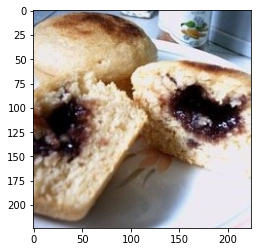

ground ing:  Flour baking powder salt shortening white sugar egg milk 

predicted ing:  Egg white sugar salt salt salt salt salt 


image


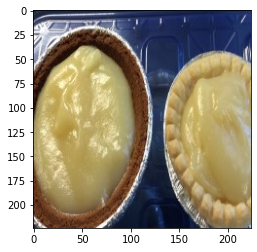

ground ing:  Butter flour white sugar egg milk vanilla bake 

predicted ing:  Butter white sugar salt salt salt salt salt 


image


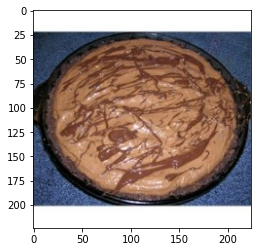

ground ing:  Chocolate egg butter chocolate sugar peanut butter whipping cream 

predicted ing:  Chocolate butter chocolate chocolate chocolate chocolate chocolate 


image


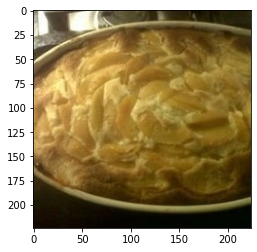

ground ing:  Flour baking powder salt white sugar milk peach butter 

predicted ing:  Flour milk salt salt salt salt salt 


image


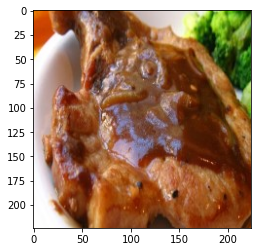

ground ing:  Onion garlic pork chop water flour chicken broth sauce 

predicted ing:  Chicken garlic garlic garlic black pepper black pepper black pepper 


image


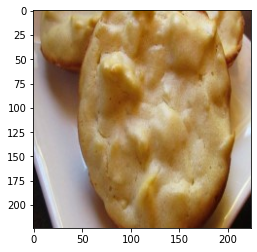

ground ing:  Egg margarine honey almond water coconut flour 

predicted ing:  Egg white sugar salt salt salt salt salt 


image


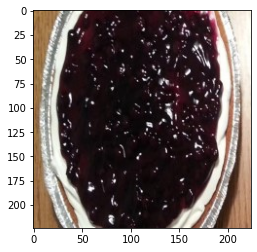

ground ing:  Pecan banana topping thawed cream cheese blueberry white sugar pastry 

predicted ing:  Butter white sugar white sugar white sugar vanilla topping thawed vanilla 


image


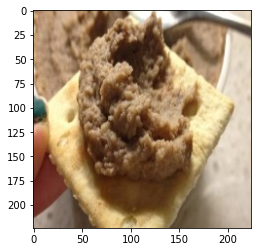

ground ing:  Water lentil chicken olive onion walnut pepper 

predicted ing:  Chicken garlic garlic black pepper black pepper black pepper black pepper 


image


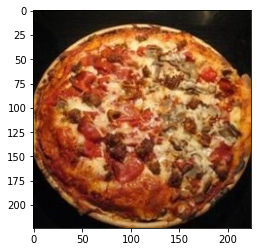

ground ing:  Water flour semolina white sugar salt olive yeast 

predicted ing:  Chicken onion onion onion onion black pepper black pepper 


image


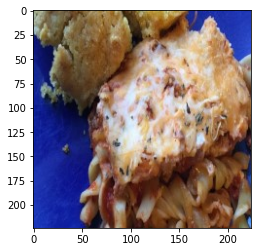

ground ing:  Turkey tomato sauce white sugar sour cream cream cheese noodle cheddar 

predicted ing:  Chicken onion onion onion onion black pepper black pepper 


image


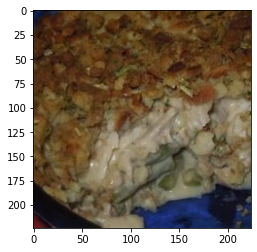

ground ing:  Bread sour cream mushroom celery onion green bean turkey 

predicted ing:  Chicken onion onion onion onion black pepper black pepper 


image


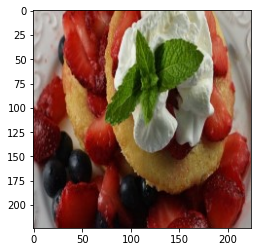

ground ing:  Milk butter egg white sugar flour baking powder vanilla 

predicted ing:  Strawberry white sugar white sugar white sugar vanilla vanilla vanilla 


image


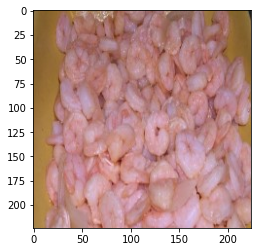

ground ing:  Vegetable oil vinegar hot pepper celery salt onion shrimp 

predicted ing:  Butter white sugar salt salt salt salt black pepper 


image


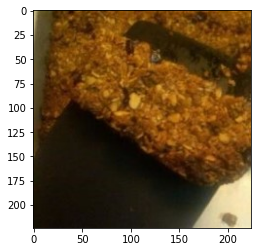

ground ing:  Butter brown sugar vanilla cinnamon oat wheat baking powder 

predicted ing:  Butter white sugar butter sugar salt salt chocolate 


image


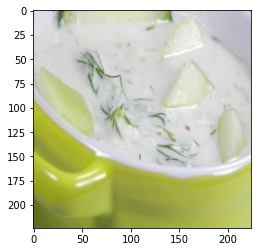

ground ing:  Yogurt cucumber olive lemon juice pepper dill garlic 

predicted ing:  Tomato onion onion onion onion onion black pepper 


image


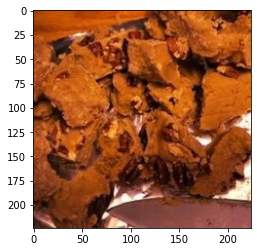

ground ing:  Brown sugar white sugar cream corn syrup salt vanilla pecan 

predicted ing:  Butter butter butter butter salt salt salt 


image


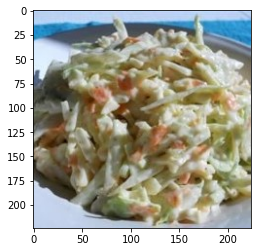

ground ing:  Cabbage carrot mayonnaise vinegar white sugar onion pepper 

predicted ing:  Pasta onion onion onion onion black pepper black pepper 


image


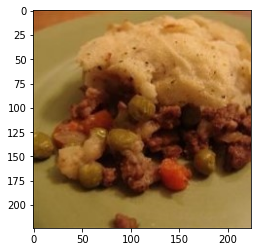

ground ing:  Ground beef onion tomato vegetable oil salt potato cheddar 

predicted ing:  Egg white sugar salt salt salt black pepper black pepper 


image


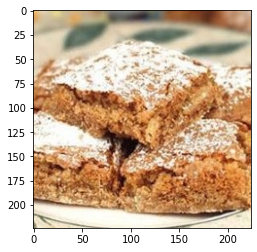

ground ing:  Butter flour white sugar egg brown sugar walnut coconut 

predicted ing:  Butter white sugar white sugar salt salt salt salt 


image


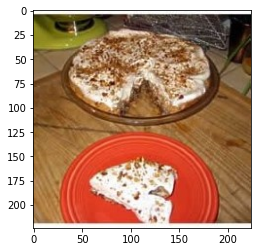

ground ing:  Egg white sugar vanilla baking powder butter pecan topping thawed 

predicted ing:  Ham milk milk sugar sugar sugar chocolate 


image


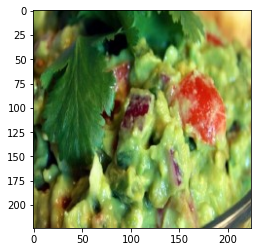

ground ing:  Avocado salt tomato onion pepper cilantro lime juice 

predicted ing:  Pasta onion onion onion onion onion pepper 


image


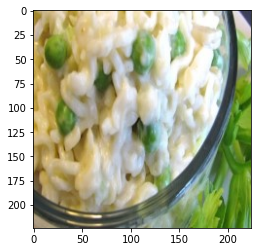

ground ing:  Chicken celery chestnut onion bell pepper pea mayonnaise 

predicted ing:  Pasta onion onion onion onion onion onion 


image


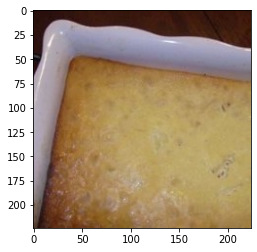

ground ing:  Egg white sugar ricotta vanilla whipping cream rice pineapple 

predicted ing:  Potato salt salt salt salt salt black pepper 


image


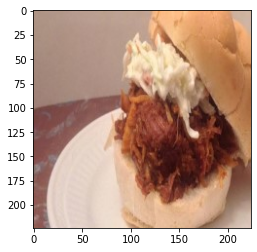

ground ing:  Beef pork tomato worcestershire sauce vinegar onion water 

predicted ing:  Cake white sugar white sugar white sugar vanilla vanilla vanilla 


image


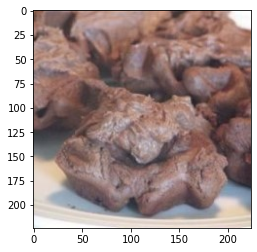

ground ing:  Flour cocoa powder white sugar salt egg margarine vanilla 

predicted ing:  Butter white sugar white sugar salt salt salt salt 


image


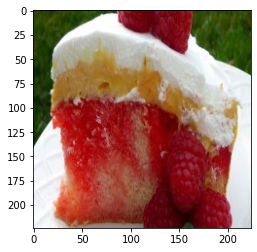

ground ing:  Cake lemon water raspberry vanilla milk topping thawed 

predicted ing:  Cake white sugar white sugar white sugar vanilla topping thawed vanilla 


image


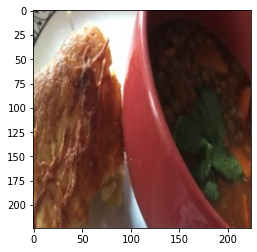

ground ing:  Egg bread cream corn sour cream butter swiss cheese 

predicted ing:  Cake white sugar salt salt salt salt salt 


image


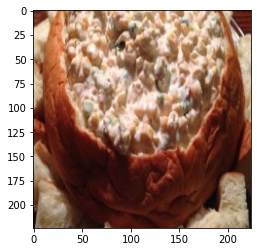

ground ing:  Corn chile green onion sour cream pepper mayonnaise cheddar 

predicted ing:  Cream cheese vegetable oil onion black pepper black pepper black pepper black pepper 


image


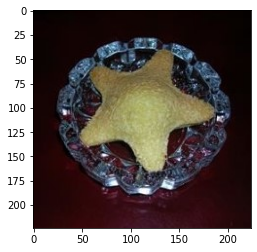

ground ing:  Egg white sugar butter flour raisin chocolate apple 

predicted ing:  Egg white sugar white sugar white sugar salt vanilla chocolate 


image


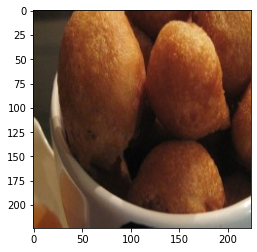

ground ing:  Flour flour cinnamon cardamom white sugar coconut fry 

predicted ing:  Egg white sugar white sugar salt salt salt salt 


image


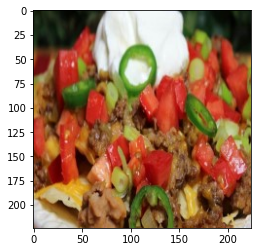

ground ing:  Ground beef onion pepper cheddar bean tortillas pepper 

predicted ing:  Ground beef onion onion onion onion onion pepper 


image


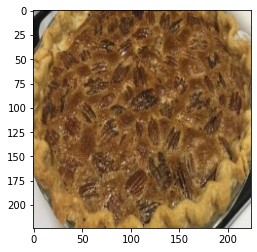

ground ing:  Bake egg corn syrup white sugar butter vanilla pecan 

predicted ing:  Butter white sugar white sugar salt salt salt salt 


image


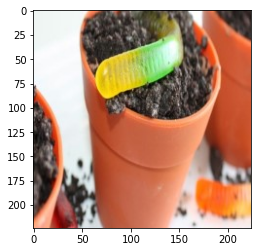

ground ing:  Butter cream cheese sugar vanilla milk topping thawed chocolate 

predicted ing:  Butter butter butter chocolate chocolate chocolate chocolate 


image


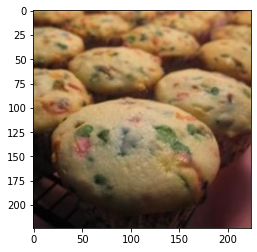

ground ing:  Cake water vegetable oil egg 1/2 cup multicolored sprinkles (jimmies) topping thawed chocolate 

predicted ing:  Butter white sugar salt salt salt salt salt 


image


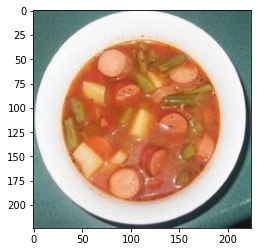

ground ing:  Onion margarine potato tomato sauce chicken broth green bean beef 

predicted ing:  Tomato onion onion onion onion onion pepper 


image


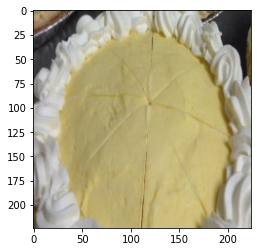

ground ing:  Cream ice banana vanilla banana bake cream 

predicted ing:  Butter white sugar white sugar salt salt vanilla topping thawed 


image


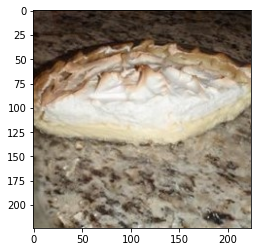

ground ing:  Egg milk lemon juice ham egg vanilla white sugar 

predicted ing:  Ham butter butter chocolate chocolate chocolate chocolate 


image


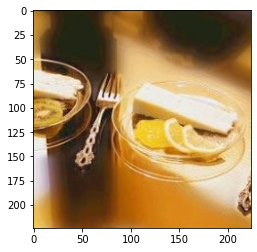

ground ing:  Ricotta cream cheese white sugar egg flour sour cream vanilla 

predicted ing:  White sugar white sugar white sugar water white sugar salt salt 


image


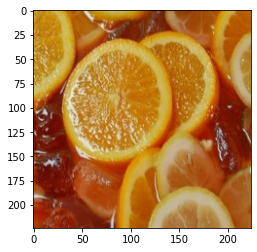

ground ing:  Lemon orange lemon soda apple white sugar ice 

predicted ing:  Cranberry white sugar white sugar white sugar white sugar water water 


image


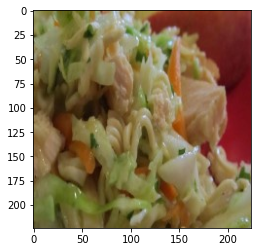

ground ing:  Cabbage green onion chicken almond olive white sugar vinegar 

predicted ing:  Pasta onion onion onion onion onion black pepper 


image


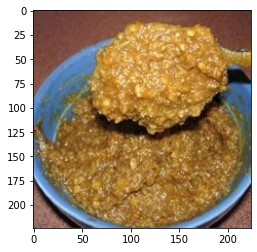

ground ing:  Milk white sugar egg butter vanilla coconut macadamia nut 

predicted ing:  Butter white sugar egg salt salt salt salt 


image


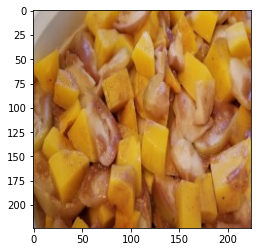

ground ing:  Brown sugar butter flour salt mace butternut squash apple 

predicted ing:  Pasta onion onion onion onion black pepper black pepper 


image


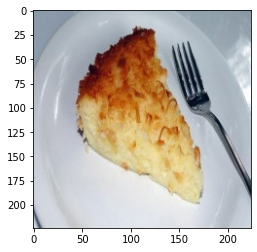

ground ing:  Milk baking mix butter white sugar egg vanilla coconut 

predicted ing:  Chicken onion onion onion onion black pepper black pepper 


image


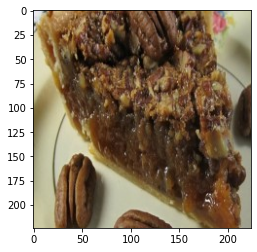

ground ing:  Corn syrup brown sugar salt butter egg pecan pastry 

predicted ing:  Chicken butter butter black pepper black pepper black pepper black pepper 


image


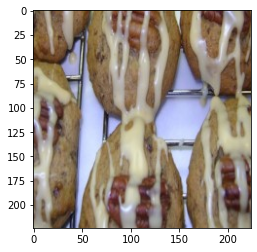

ground ing:  Brown sugar shortening egg meat flour salt baking soda 

predicted ing:  Butter butter sugar sugar sugar salt vanilla 


image


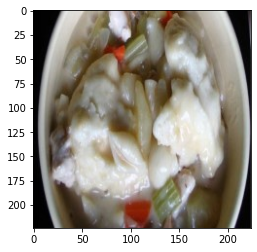

ground ing:  Chicken carrot potato chicken mushroom pasta biscuit 

predicted ing:  Tomato onion onion onion onion onion onion 


image


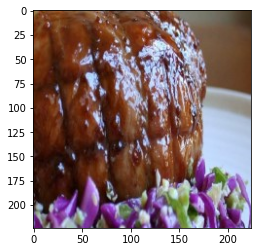

ground ing:  Roast maple syrup mustard vinegar soy sauce salt black pepper 

predicted ing:  Chocolate white sugar white sugar milk salt salt salt 


image


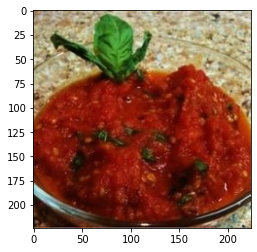

ground ing:  Olive garlic tomato white sugar water basil pepper 

predicted ing:  Tomato onion onion onion onion onion pepper 


image


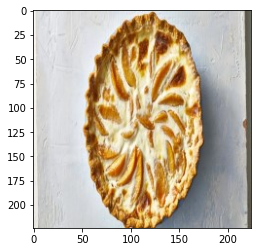

ground ing:  Pastry peach white sugar flour salt nutmeg whipping cream 

predicted ing:  Cream cheese white sugar salt salt salt salt salt 


image


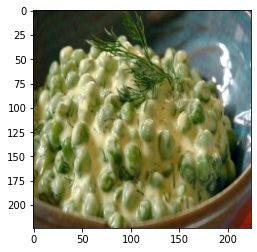

ground ing:  Pea mayonnaise sour cream horseradish mustard dill black pepper 

predicted ing:  Vegetable oil onion onion onion onion onion pepper 


image


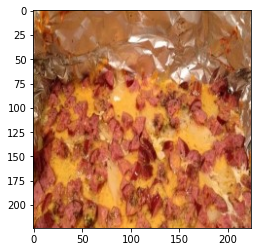

ground ing:  Potato black pepper cheddar 1 pound polish kielbasa dill caraway milk 

predicted ing:  Ground beef onion onion onion onion black pepper black pepper 


image


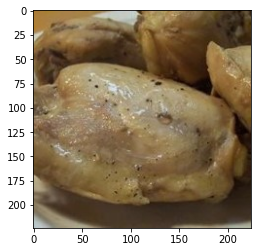

ground ing:  Chicken vinegar soy sauce black pepper olive garlic bay leaf 

predicted ing:  Butter onion onion onion onion black pepper black pepper 


image


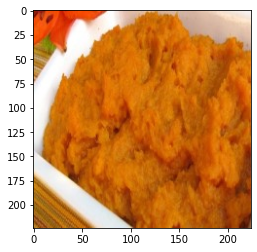

ground ing:  Potato brown sugar orange bourbon butter pumpkin marshmallow 

predicted ing:  Potato onion onion onion onion black pepper black pepper 


image


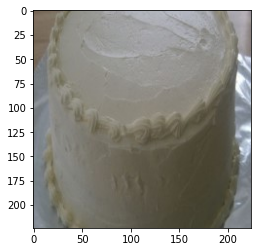

ground ing:  Butter shortening sugar vanilla butter whipping cream flour 

predicted ing:  White sugar white sugar white sugar white sugar salt vanilla topping thawed 


image


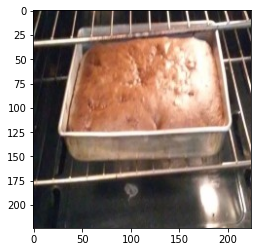

ground ing:  Chocolate cherry egg white sugar butter milk chocolate 

predicted ing:  Butter white sugar white sugar white sugar salt sugar vanilla 


image


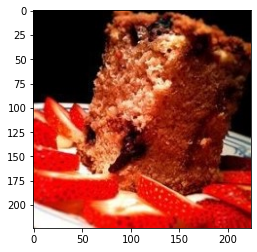

ground ing:  Yogurt flour white sugar vegetable oil egg yeast sugar 

predicted ing:  Chocolate white sugar white sugar chocolate chocolate vanilla chocolate 


image


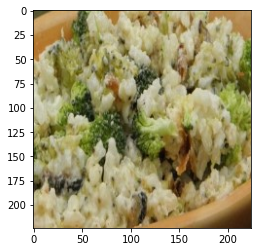

ground ing:  Water milk broccoli broccoli cauliflower brown rice salt 

predicted ing:  Chicken onion onion onion onion black pepper black pepper 


image


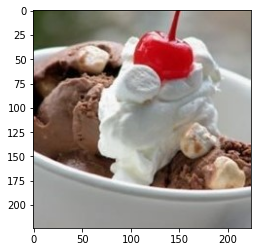

ground ing:  Milk cocoa powder cream cream vanilla pecan marshmallow 

predicted ing:  Cake white sugar white sugar white sugar vanilla topping thawed topping thawed 


image


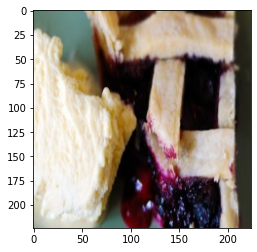

ground ing:  White sugar cornstarch salt cinnamon blueberry pastry butter 

predicted ing:  Butter white sugar white sugar sugar sugar vanilla vanilla 


image


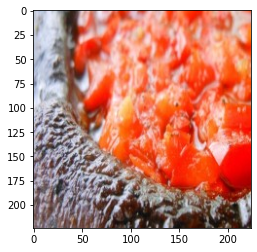

ground ing:  Bell pepper garlic olive onion salt black pepper mushroom 

predicted ing:  Cranberry white sugar white sugar white sugar water vanilla topping thawed 


image


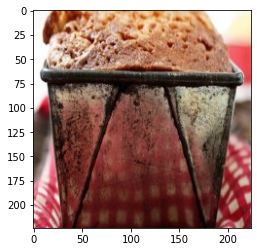

ground ing:  Butter egg white sugar flour whipping cream vanilla lemon 

predicted ing:  Cake white sugar white sugar sugar sugar vanilla chocolate 


image


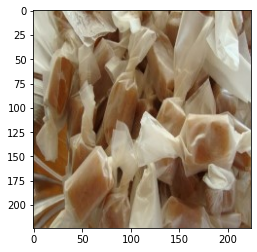

ground ing:  Brown sugar white sugar butter corn syrup cream milk vanilla 

predicted ing:  Egg white sugar salt salt salt vanilla vanilla 


image


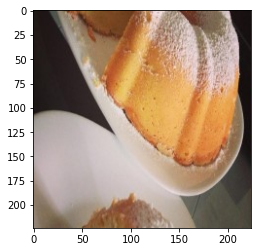

ground ing:  Butter cream cheese white sugar vanilla almond egg flour 

predicted ing:  Lemon white sugar white sugar white sugar salt salt salt 


image


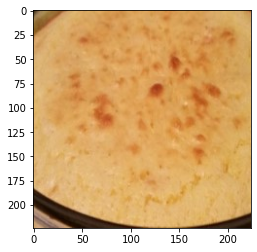

ground ing:  Cream corn sour cream egg butter white sugar muffin 

predicted ing:  Potato onion onion onion onion black pepper black pepper 




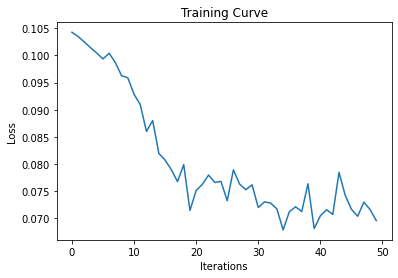

In [14]:
batch_size = 64 
embed_size = 793
hidden_size = 1024
num_epochs = 50

# The size of the vocabulary.
vocab_size = len(ing_map) + 1

# Initialize the encoder and decoder. 
encoder = EncoderCNN(embed_size)
#encoder_optimizer = torch.optim.Adam(encoder.parameters(), lr=0.00008)#, betas=(0.9, 0.999), eps=1e-08)

decoder = DecoderRNN(embed_size, hidden_size, vocab_size)
#decoder_optimizer = torch.optim.Adam(decoder.parameters(), lr=0.00008)#, betas=(0.9, 0.999), eps=1e-08)

# Move models to GPU if CUDA is available. 
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
encoder.to(device)
decoder.to(device)

# Define the loss function. 
criterion = nn.BCELoss().cuda() if torch.cuda.is_available() else nn.CrossEntropyLoss()
params = list(decoder.parameters()) + list(encoder.embed.parameters()) #+ list(encoder.bn.parameters())
optimizer = torch.optim.Adam(params, lr=0.0008)#, betas=(0.9, 0.999), eps=1e-08)

train(encoder,decoder,num_epochs,batch_size,criterion,optimizer,vocab_size)